In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

url = "https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Red%20Wine/winequality-red.csv"
data = pd.read_csv(url, error_bad_lines=False)

# Display the first few rows of the DataFrame using head()
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
328,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6
1495,7.0,0.43,0.02,1.9,0.080,15.0,28.0,0.99492,3.35,0.81,10.6,6
92,8.6,0.49,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5
98,7.6,0.90,0.06,2.5,0.079,5.0,10.0,0.99670,3.39,0.56,9.8,5
871,6.9,0.56,0.03,1.5,0.086,36.0,46.0,0.99522,3.53,0.57,10.6,5
58,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0,5
485,10.2,0.67,0.39,1.9,0.054,6.0,17.0,0.99760,3.17,0.47,10.0,5
963,8.8,0.27,0.39,2.0,0.100,20.0,27.0,0.99546,3.15,0.69,11.2,6
1592,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
325,10.0,0.49,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6


In [4]:
data.shape

(1599, 12)

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# no missing values

Plotting headmap correlation matrix

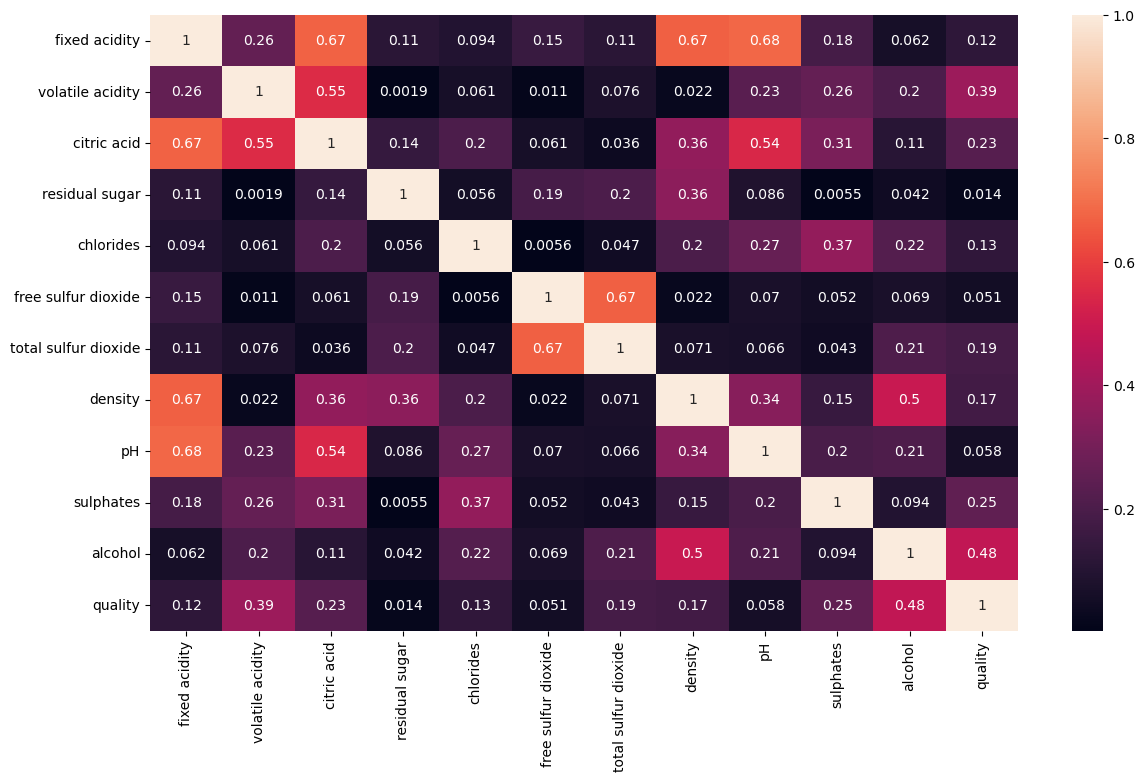

In [6]:
df_corr=data.corr().abs()#This code will get the corellation of one variable with all the other variable

plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

seems like fixed quality and pH are more corellated compared to others

Make sure they are really correlated(it should follow some trend)

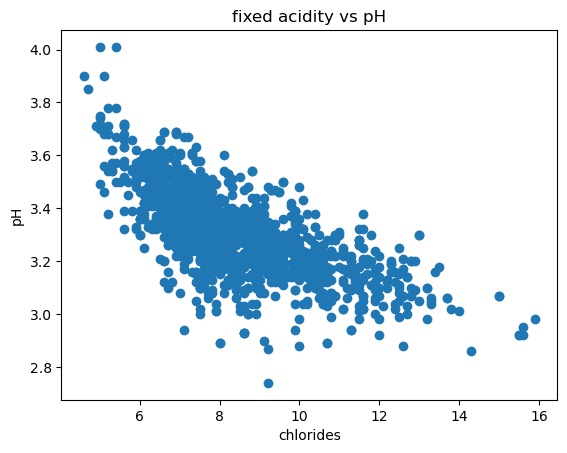

In [7]:
plt.scatter(data['fixed acidity'],data['pH'])
plt.xlabel('chlorides')
plt.ylabel('pH')
plt.title('fixed acidity vs pH')
plt.show()

There is no correlation

In [8]:
x=data.drop(columns=['quality'])
y=data['quality']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [10]:
#Write one function and call as many as times to check accuracy_score of different models
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n=================Train Result==================")
        
        print(f"Accuracy Score:{accuracy_score(y_train, y_pred)*100:.2f}%")
    
    elif train==False:
        
        pred=clf.predict(x_test)
        
        print("\n=================Test Result===================")
        
        print(f"Accuracy Score:{accuracy_score(y_test, pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))
        

In [11]:
#Model Initiation
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
#call the function and pass dataset to check train and test score
metric_score(clf,x_train,x_test,y_train,y_test,train=True) # This is for training score

metric_score(clf,x_train,x_test,y_train,y_test,train=False) # This is for testing score


=================Train Result==================
Accuracy Score:100.00%

=================Test Result===================
Accuracy Score:61.50%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.50      0.33      0.40         3
           4       0.09      0.09      0.09        11
           5       0.66      0.66      0.66       157
           6       0.65      0.64      0.64       168
           7       0.56      0.58      0.57        57
           8       0.14      0.25      0.18         4

    accuracy                           0.61       400
   macro avg       0.43      0.42      0.42       400
weighted avg       0.62      0.61      0.62       400



# Let's Understand confusion matrix for multi_class

In [13]:
#Prediction for confusion matrix
y_pred=clf.predict(x_test)

#create confusion_matrix
confusion_matrix(y_test,y_pred)

array([[  1,   0,   1,   0,   1,   0],
       [  1,   1,   7,   2,   0,   0],
       [  0,   7, 103,  42,   5,   0],
       [  0,   3,  36, 107,  19,   3],
       [  0,   0,   8,  13,  33,   3],
       [  0,   0,   1,   1,   1,   1]], dtype=int64)

In [14]:
# converting into DataFrame to understand it better
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Q3','Q4','Q5','Q6','Q7','Q8'],index=['Q3','Q4','Q5','Q6','Q7','Q8'])

,Q3,Q4,Q5,Q6,Q7,Q8
Q3,1,0,1,0,1,0
Q4,1,1,7,2,0,0
Q5,0,7,103,42,5,0
Q6,0,3,36,107,19,3
Q7,0,0,8,13,33,3
Q8,0,0,1,1,1,1


# Let's See How the tree looks like

In [15]:
feature_name=list(x.columns)
class_name=list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [16]:
!pip install sklearn
!pip install pydotplus
!pip install graphviz
import os
os.environ['PATH']=os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image
import pydotplus

#create a dot_file which stores the tree structure
dot_data=export_graphviz(clf,feature_names=feature_name,rounded=True,filled=True)

#Draw Graph
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png("myTree.png")
# show graph
Image(graph.create_png())

In [18]:
#We are tuning your important hyperparameters right now,we are passing the different values for both parameters
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,15),       # Maximum depth of the tree
    'min_samples_leaf':range(2,6),  #Minimum number of samples required to be at the leaf node
    'min_samples_split':range(3,8), #Minimum number of samples required to split an internal node.
    'max_leaf_nodes':range(5,15)     #If none then unlimited number leaf nodes.
}

In [19]:
grid_search=GridSearchCV(estimator=clf,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)  # use all the cores in your system. for performance improvement

In [20]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 15),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [21]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 7, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [23]:
#Initiate DecisionTreeClassifier with new parameters and train
clf=DecisionTreeClassifier(criterion='entropy',min_samples_split=2,max_depth=8,min_samples_leaf=3,max_leaf_nodes=10)

#Train the model
clf.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=10,
                       min_samples_leaf=3)

In [24]:
#call the function and pass the dataset to check train and test score
metric_score(clf,x_train,x_test,y_train,y_test,train=True)  # this is for training score
metric_score(clf,x_train,x_test,y_train,y_test,train=False) # this is for testing score


=================Train Result==================
Accuracy Score:61.47%

=================Test Result===================
Accuracy Score:61.50%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.64      0.71      0.67       157
           6       0.59      0.65      0.62       168
           7       0.63      0.42      0.51        57
           8       0.00      0.00      0.00         4

    accuracy                           0.61       400
   macro avg       0.31      0.30      0.30       400
weighted avg       0.59      0.61      0.60       400



In [25]:
#Initiate DecisionTreeClassifier with new parameters and train
clf=DecisionTreeClassifier(criterion='entropy',min_samples_split=4,max_depth=7,min_samples_leaf=2)

#Train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       min_samples_split=4)

In [26]:
#call the function and pass the dataset to check train and test score
metric_score(clf,x_train,x_test,y_train,y_test,train=True)  # this is for training score
metric_score(clf,x_train,x_test,y_train,y_test,train=False) # this is for testing score


=================Train Result==================
Accuracy Score:73.64%

=================Test Result===================
Accuracy Score:62.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.50      0.33      0.40         3
           4       0.15      0.18      0.17        11
           5       0.66      0.69      0.68       157
           6       0.62      0.65      0.64       168
           7       0.62      0.44      0.52        57
           8       0.25      0.25      0.25         4

    accuracy                           0.62       400
   macro avg       0.47      0.43      0.44       400
weighted avg       0.62      0.62      0.62       400



In [27]:
# Prediction for confusion matrix
y_pred=clf.predict(x_test)

#converting into dataframe to understand this better
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=('Q3','Q4','Q5','Q6','Q7','Q8'),index=['Q3','Q4','Q5','Q6','Q7','Q8'])

,Q3,Q4,Q5,Q6,Q7,Q8
Q3,1,0,2,0,0,0
Q4,0,2,5,4,0,0
Q5,1,6,109,37,3,1
Q6,0,5,41,110,11,1
Q7,0,0,8,23,25,1
Q8,0,0,0,2,1,1


In [ ]:
feature_name=list(x.columns)
class_name=list(y_train.unique())
#create a dot_file which stores the tree structure
dot_data=export_graphviz(clf,rounded=True,filled=True)
#Draw graph
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree_hype.png')
#show graph
Image(graph.create_png())

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.50      0.33      0.40         3
           4       0.15      0.18      0.17        11
           5       0.66      0.69      0.68       157
           6       0.62      0.65      0.64       168
           7       0.62      0.44      0.52        57
           8       0.25      0.25      0.25         4

    accuracy                           0.62       400
   macro avg       0.47      0.43      0.44       400
weighted avg       0.62      0.62      0.62       400

